# 1 - Import libraries

In [29]:
# Import the different libraries needed 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


pd.options.display.max_columns = None


# 2 - Load data

In [2]:
# load csv file in pandas

# data = pd.read_csv('fifa21_male2.csv')

In [30]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # to get the password without showing the input
password = getpass.getpass()

········


In [528]:
# here I loaded the database from Mysql as the questions will be answered with mysql query.

connection_string = 'mysql+pymysql://root:' + password + '@localhost/fifa'
engine = create_engine(connection_string)

data = pd.read_sql_query('SELECT * FROM fifa21_male2', engine)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",,â‚¬625K,â‚¬7K,â‚¬0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 â˜…,2â˜…,Medium,High,2 â˜…,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis GarcÃ­a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",,â‚¬600K,â‚¬7K,â‚¬1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 â˜…,3â˜…,Medium,Medium,1 â˜…,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",,â‚¬1.1M,â‚¬15K,â‚¬0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 â˜…,4â˜…,Medium,Low,2 â˜…,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,,,â‚¬0,â‚¬0,â‚¬0,2009,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,,75,34,41,,68,5,21,64,21,21,1348,369,3 â˜…,1â˜…,,,1 â˜…,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",,â‚¬5.5M,â‚¬12K,â‚¬7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 â˜…,4â˜…,High,Medium,4 â˜…,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# 3 - Explore the data

In [334]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",,â‚¬625K,â‚¬7K,â‚¬0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 â˜…,2â˜…,Medium,High,2 â˜…,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis GarcÃ­a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",,â‚¬600K,â‚¬7K,â‚¬1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 â˜…,3â˜…,Medium,Medium,1 â˜…,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",,â‚¬1.1M,â‚¬15K,â‚¬0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 â˜…,4â˜…,Medium,Low,2 â˜…,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,,,â‚¬0,â‚¬0,â‚¬0,2009,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,,75,34,41,,68,5,21,64,21,21,1348,369,3 â˜…,1â˜…,,,1 â˜…,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",,â‚¬5.5M,â‚¬12K,â‚¬7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 â˜…,4â˜…,High,Medium,4 â˜…,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [335]:
data.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Skill,Dribbling,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Reactions,Power,Shot Power,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Penalties,Defending,Marking,Standing Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,4855.322034,35.347458,73.864407,74.305085,76.084746,2.220339,288.296610,59.644068,53.296610,59.254237,68.254237,295.050847,60.881356,54.805085,62.025424,67.796610,285.449153,57.033898,55.381356,71.788136,298.406780,66.745763,52.652542,69.610169,56.067797,300.949153,64.101695,56.466102,61.677966,64.694915,135.627119,47.330508,49.898305,90.228814,17.144068,19.618644,25.101695,20.279661,19.500000,1694.008475,382.677966,60.279661,64.135593,68.440678,69.288136,53.483051,67.050847,11.932203
std,3887.128334,2.696554,6.055181,5.680238,7.155867,4.358184,84.957839,20.536615,22.294574,20.421702,16.935366,91.816134,19.852520,23.064850,16.825125,19.057968,63.329500,14.737551,15.565093,8.919250,54.287339,16.513753,15.339117,11.834351,22.786534,68.788024,17.705757,23.924983,22.261799,19.783663,69.439859,24.656982,24.148186,98.546480,21.067363,20.729400,25.375266,22.366369,20.422357,275.277715,36.143560,13.783978,14.067551,10.063510,9.777090,19.577037,10.479812,33.922417
min,2.000000,26.000000,57.000000,58.000000,58.000000,0.000000,76.000000,11.000000,11.000000,11.000000,21.000000,75.000000,12.000000,7.000000,20.000000,13.000000,166.000000,20.000000,24.000000,30.000000,170.000000,18.000000,19.000000,30.000000,10.000000,90.000000,20.000000,11.000000,8.000000,17.000000,35.000000,9.000000,11.000000,17.000000,4.000000,4.000000,1.000000,5.000000,2.000000,1058.000000,285.000000,29.000000,28.000000,43.000000,41.000000,16.000000,35.000000,3.000000
25%,1203.250000,34.000000,71.000000,71.000000,71.250000,0.000000,262.000000,48.500000,35.250000,48.250000,63.250000,258.000000,54.000000,36.500000,54.000000,62.250000,230.750000,48.000000,43.250000,68.000000,255.750000,59.250000,38.750000,63.000000,37.500000,281.250000,51.500000,32.500000,49.500000,54.000000,73.500000,25.000000,27.000000,47.000000,7.000000,9.000000,8.000000,9.000000,8.250000,1549.750000,354.250000,51.250000,56.000000,61.000000,63.000000,36.250000,62.000000,3.000000
50%,4158.000000,35.000000,75.000000,75.000000,76.000000,0.000000,305.000000,64.000000,59.000000,64.000000,72.000000,306.500000,66.000000,61.000000,65.000000,73.000000,292.000000,59.000000,55.000000,73.000000,310.000000,71.000000,54.000000,71.500000,65.000000,319.000000,69.000000,64.000000,68.000000,70.500000,131.500000,44.000000,46.500000,56.000000,10.000000,12.000000,12.000000,12.000000,12.000000,1726.000000,382.000000,62.500000,68.000000,68.000000,70.000000,52.000000,67.000000,4.500000
75%,7758.000000,37.000000,78.000000,78.000000,81.000000,2.750000,347.000000,74.750000,72.000000,73.000000,78.750000,365.500000,74.000000,72.750000,72.000000,80.000000,336.000000,67.750000,68.000000,77.000000,337.750000,77.000000,64.750000,77.000000,71.750000,346.250000,77.000000,77.000000,78.000000,79.750000,203.750000,70.750000,74.750000,71.000000,14.000000,21.000000,51.500000,21.000000,21.000000,1885.750000,407.750000,70.000000,74.000000,75.000000,77.000000,71.750000,74.000000,8.000000
max,13128.000000,42.000000,87.000000,87.000000,90.000000,21.000000,397.000000,90.000000,87.000

In [529]:
data.shape

(118, 107)

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 107 entries, ID to Gender
dtypes: float64(2), int64(46), object(59)
memory usage: 98.8+ KB


In [338]:
pd.set_option('max_row', None) # to get all the column
data.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys              object
Skill                 int64
Dribbling             int64
Curve                object
FK Accuracy           int64
Long Passing          int64
Ball Control        

In [339]:
pd.set_option('max_row', None)
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [340]:
data.isna().sum()

ID                  0
Name                0
Age                 0
OVA                 0
Nationality         0
Club                0
BOV                 0
BP                  0
Position            0
Player Photo        0
Club Logo           0
Flag Photo          0
POT                 0
Team & Contract     0
Height              0
Weight              0
foot                0
Growth              0
Joined              0
Loan Date End       0
Value               0
Wage                0
Release Clause      0
Contract            0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina   

In [214]:
# for column in cat.columns:
#    print(column, cat[column].unique())

# 4- Data Cleaning

In [342]:
#  Replace in the database ' ' by '_'

data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [343]:
# fill the data nan

data.fillna(0)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",,â‚¬625K,â‚¬7K,â‚¬0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 â˜…,2â˜…,Medium,High,2 â˜…,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis GarcÃ­a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",,â‚¬600K,â‚¬7K,â‚¬1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 â˜…,3â˜…,Medium,Medium,1 â˜…,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",,â‚¬1.1M,â‚¬15K,â‚¬0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 â˜…,4â˜…,Medium,Low,2 â˜…,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,,,â‚¬0,â‚¬0,â‚¬0,2009,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,,75,34,41,,68,5,21,64,21,21,1348,369,3 â˜…,1â˜…,,,1 â˜…,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",,â‚¬5.5M,â‚¬12K,â‚¬7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 â˜…,4â˜…,High,Medium,4 â˜…,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,https://cdn

In [344]:
#  Clean data from the following columns: wage, value, release_clause.
# Convert to the same format the value in those columns by removing 'â‚¬', 'M', 'K' and '.' to get numerical data.
# as I used Mysql to load the data 


def num_cleaning(x):
    if (x.startswith('â‚¬') and x.endswith('K') and (x.find('.')>=0)):
        return x.replace("â‚¬","").replace("K","").replace(".","") + "00"
    elif(x.startswith('â‚¬') and x.endswith('K')):
        return x.replace("â‚¬","").replace("K","") + "000"
    if (x.startswith('â‚¬') and x.endswith('M') and (x.find('.')>=0)):
        return x.replace("â‚¬","").replace("M","").replace(".","") + "00000"
    elif(x.startswith('â‚¬') and x.endswith('M')):
        return x.replace("â‚¬","").replace("M","") + "000000"
    else:
        return x.replace("â‚¬","")
    
data['wage'] =pd.to_numeric(data['wage'].apply(num_cleaning))
data['value'] =pd.to_numeric(data['value'].apply(num_cleaning))
data['release_clause'] =pd.to_numeric(data['release_clause'].apply(num_cleaning))

In [345]:
# drop column not required - photo and logos are not pertinent here.

data.drop(['player_photo', 'club_logo', 'flag_photo', 'loan_date_end' , 'w/f' , 'sm'], axis=1, inplace=True) 

In [346]:

data.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk'], axis=1, inplace=True)

In [347]:
data.head()


,id,name,age,ova,nationality,club,bov,bp,position,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,,208,70,69,69.0,56,14,5,15,10,12,1929,408,Medium,High,2 â˜…,71,59,70,71,68,69,4,Male
1,16,Luis GarcÃ­a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",600000,7000,1100000,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,Medium,Medium,1 â˜…,53,69,73,69,58,63,4,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",1100000,15000,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,,99,35,34,30.0,51,9,6,13,16,7,1770,354,Medium,Low,2 â˜…,45,68,76,77,36,52,11,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,82,Sunderland 2009,"5'11""",165lbs,Right,14,,0,0,0,2009,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,,75,34,41,,68,5,21,64,21,21,1348,369,,,1 â˜…,61,66,66,69,47,60,3,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",5500000,12000,7200000,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,High,Medium,4 â˜…,58,70,85,85,63,59,149,Male


In [348]:
# Check the column left
list(data.columns)


['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'hits',
 'gender']

# 5- Processing Data

In [481]:
data_model = data.filter(['id','name','age','ova','nationality','club','bov','bp','position','pot','height','weight','foot','growth','value','wage','release_clause','attacking','crossing','finishing','heading_accuracy','short_passing','volleys','skill','dribbling','curve','fk_accuracy','long_passing','ball_control','movement','acceleration','sprint_speed','agility','reactions','balance','power','shot_power','jumping','stamina','strength','long_shots','mentality','aggression','interceptions','positioning','vision','penalties','defending','marking','standing_tackle','sliding_tackle','goalkeeping','total_stats','base_stats','a/w', 'd/w', 'ir','pac','sho','pas','dri','def','phy','hits'])

In [482]:
data_model

,id,name,age,ova,nationality,club,bov,bp,position,pot,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,"6'0""",181lbs,Left,0,625000,7000,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,208,70,69,69.0,56,1929,408,Medium,High,2 â˜…,71,59,70,71,68,69,4
1,16,Luis GarcÃ­a,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,"5'10""",143lbs,Right,0,600000,7000,1100000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,153,70,43,40.0,56,1906,385,Medium,Medium,1 â˜…,53,69,73,69,58,63,4
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,"5'9""",161lbs,Right,0,1100000,15000,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,99,35,34,30.0,51,1770,354,Medium,Low,2 â˜…,45,68,76,77,36,52,11
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,,82,"5'11""",165lbs,Right,14,0,0,0,264,54,70,60,80,,255,68,,46,64,77,176,59,62,,55,,239,63,,51,66,59,271,59,70.0,72.0,,70,75,34,41,,68,1348,369,,,1 â˜…,61,66,66,69,47,60,3
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,"5'7""",150lbs,Right,0,5500000,12000,7200000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,181,68,57,56.0,45,2014,420,High,Medium,4 â˜…,58,70,85,85,63,59,149
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,70,"5'8""",163lbs,Right,4,725000,5000,0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,79,22,26,31.0,46,1649,360,Medium,Medium,2 â˜…,91,56,56,67,27,63,7
6,80,E. BelÃ¶zoÄŸlu,38,77,Turkey,FenerbahÃ§e SK,77,CM,CM CDM,77,"5'7""",159lbs,Left,0,2800000,44000,5300000,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,190,65,65,60.0,47,2017,403,Medium,Medium,2 â˜…,44,71,83,77,62,66,7
7,241,R. Giggs,39,78,Wales,Manchester United,78,CAM,LM CM CAM,78,"5'10""",157lbs,Left,0,1000,60000,0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,120,26,43,51.0,32,1939,392,Medium,Medium,3 â˜…,60,72,85,77,41,57,9
8,244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,82,"5'10""",174lbs,Right,6,0,0,0,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,242,78,81,83.0,43,1774,378,,,3 â˜…,67,36,67,53,81,74,4
9,246,P. Scholes,37,80,England,Manchester United,82,CAM,CM CDM,80,"5'7""",157lbs,Right,0,400000,40000,0,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,143,58,49,36.0,47,2065,415,Medium,Medium,2 â˜…,53,76,87,79,59,61,7


In [483]:
cat = data_model.select_dtypes('object')
#cat

In [484]:
y = data_model['value']
X = data_model.drop(['value'], axis=1)

In [485]:
def clean_dataset(data_model):
    assert isinstance(data_model, pd.DataFrame), "data_model needs to be a pd.DataFrame"
    data_model.dropna(inplace=True)
    indices_to_keep = ~data_model.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_model[indices_to_keep].astype(np.float64)

In [486]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [487]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(118, 45)


In [488]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [489]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [510]:
X_cat['position'].value_counts()

                 39
ST               11
GK               10
CB                8
CDM CM            5
CM CDM            3
RM                3
RB                2
CAM               2
ST CAM            2
LM                2
CM                2
LM ST             2
CAM RM RW LM      1
LWB LM LB LW      1
LB                1
CDM CM RM         1
LM CAM RM         1
CDM CM RB         1
CM RM RB          1
CAM CM RM         1
RW                1
CM CAM            1
CF ST             1
RM CAM            1
CF                1
LM CM CAM         1
RW RM             1
LM CAM            1
CDM CM RM RWB     1
CDM LB LM         1
CM CDM CAM        1
RB CB RWB         1
CM RM             1
RM RB CM          1
CM CAM CDM        1
CF ST CAM LW      1
ST CF             1
ST CF RW          1
CM CDM LM CAM     1
Name: position, dtype: int64

# 6 - Modeling

In [511]:
X = np.concatenate([x_normalized, encoded], axis=1)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [513]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [514]:
predictions  = model.predict(X_test)
predictions.shape

(36,)

# 7 -Model Validation

In [515]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.23646951218405354, 1387024.1545403805, 1923836005278.4575)

In [516]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.23646951218405354, 1387024.1545403805, 1923836005278.4575)

In [517]:
mse = mean_squared_error(y_test, predictions)
print(mse)

1923836005278.4575


In [518]:
rmse = math.sqrt(mse)
print(rmse)

1387024.1545403805


In [519]:
r2 = r2_score(y_test, predictions)
print(r2)

0.23646951218405354


In [520]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

1.0394735111869395


# 8 - Reporting

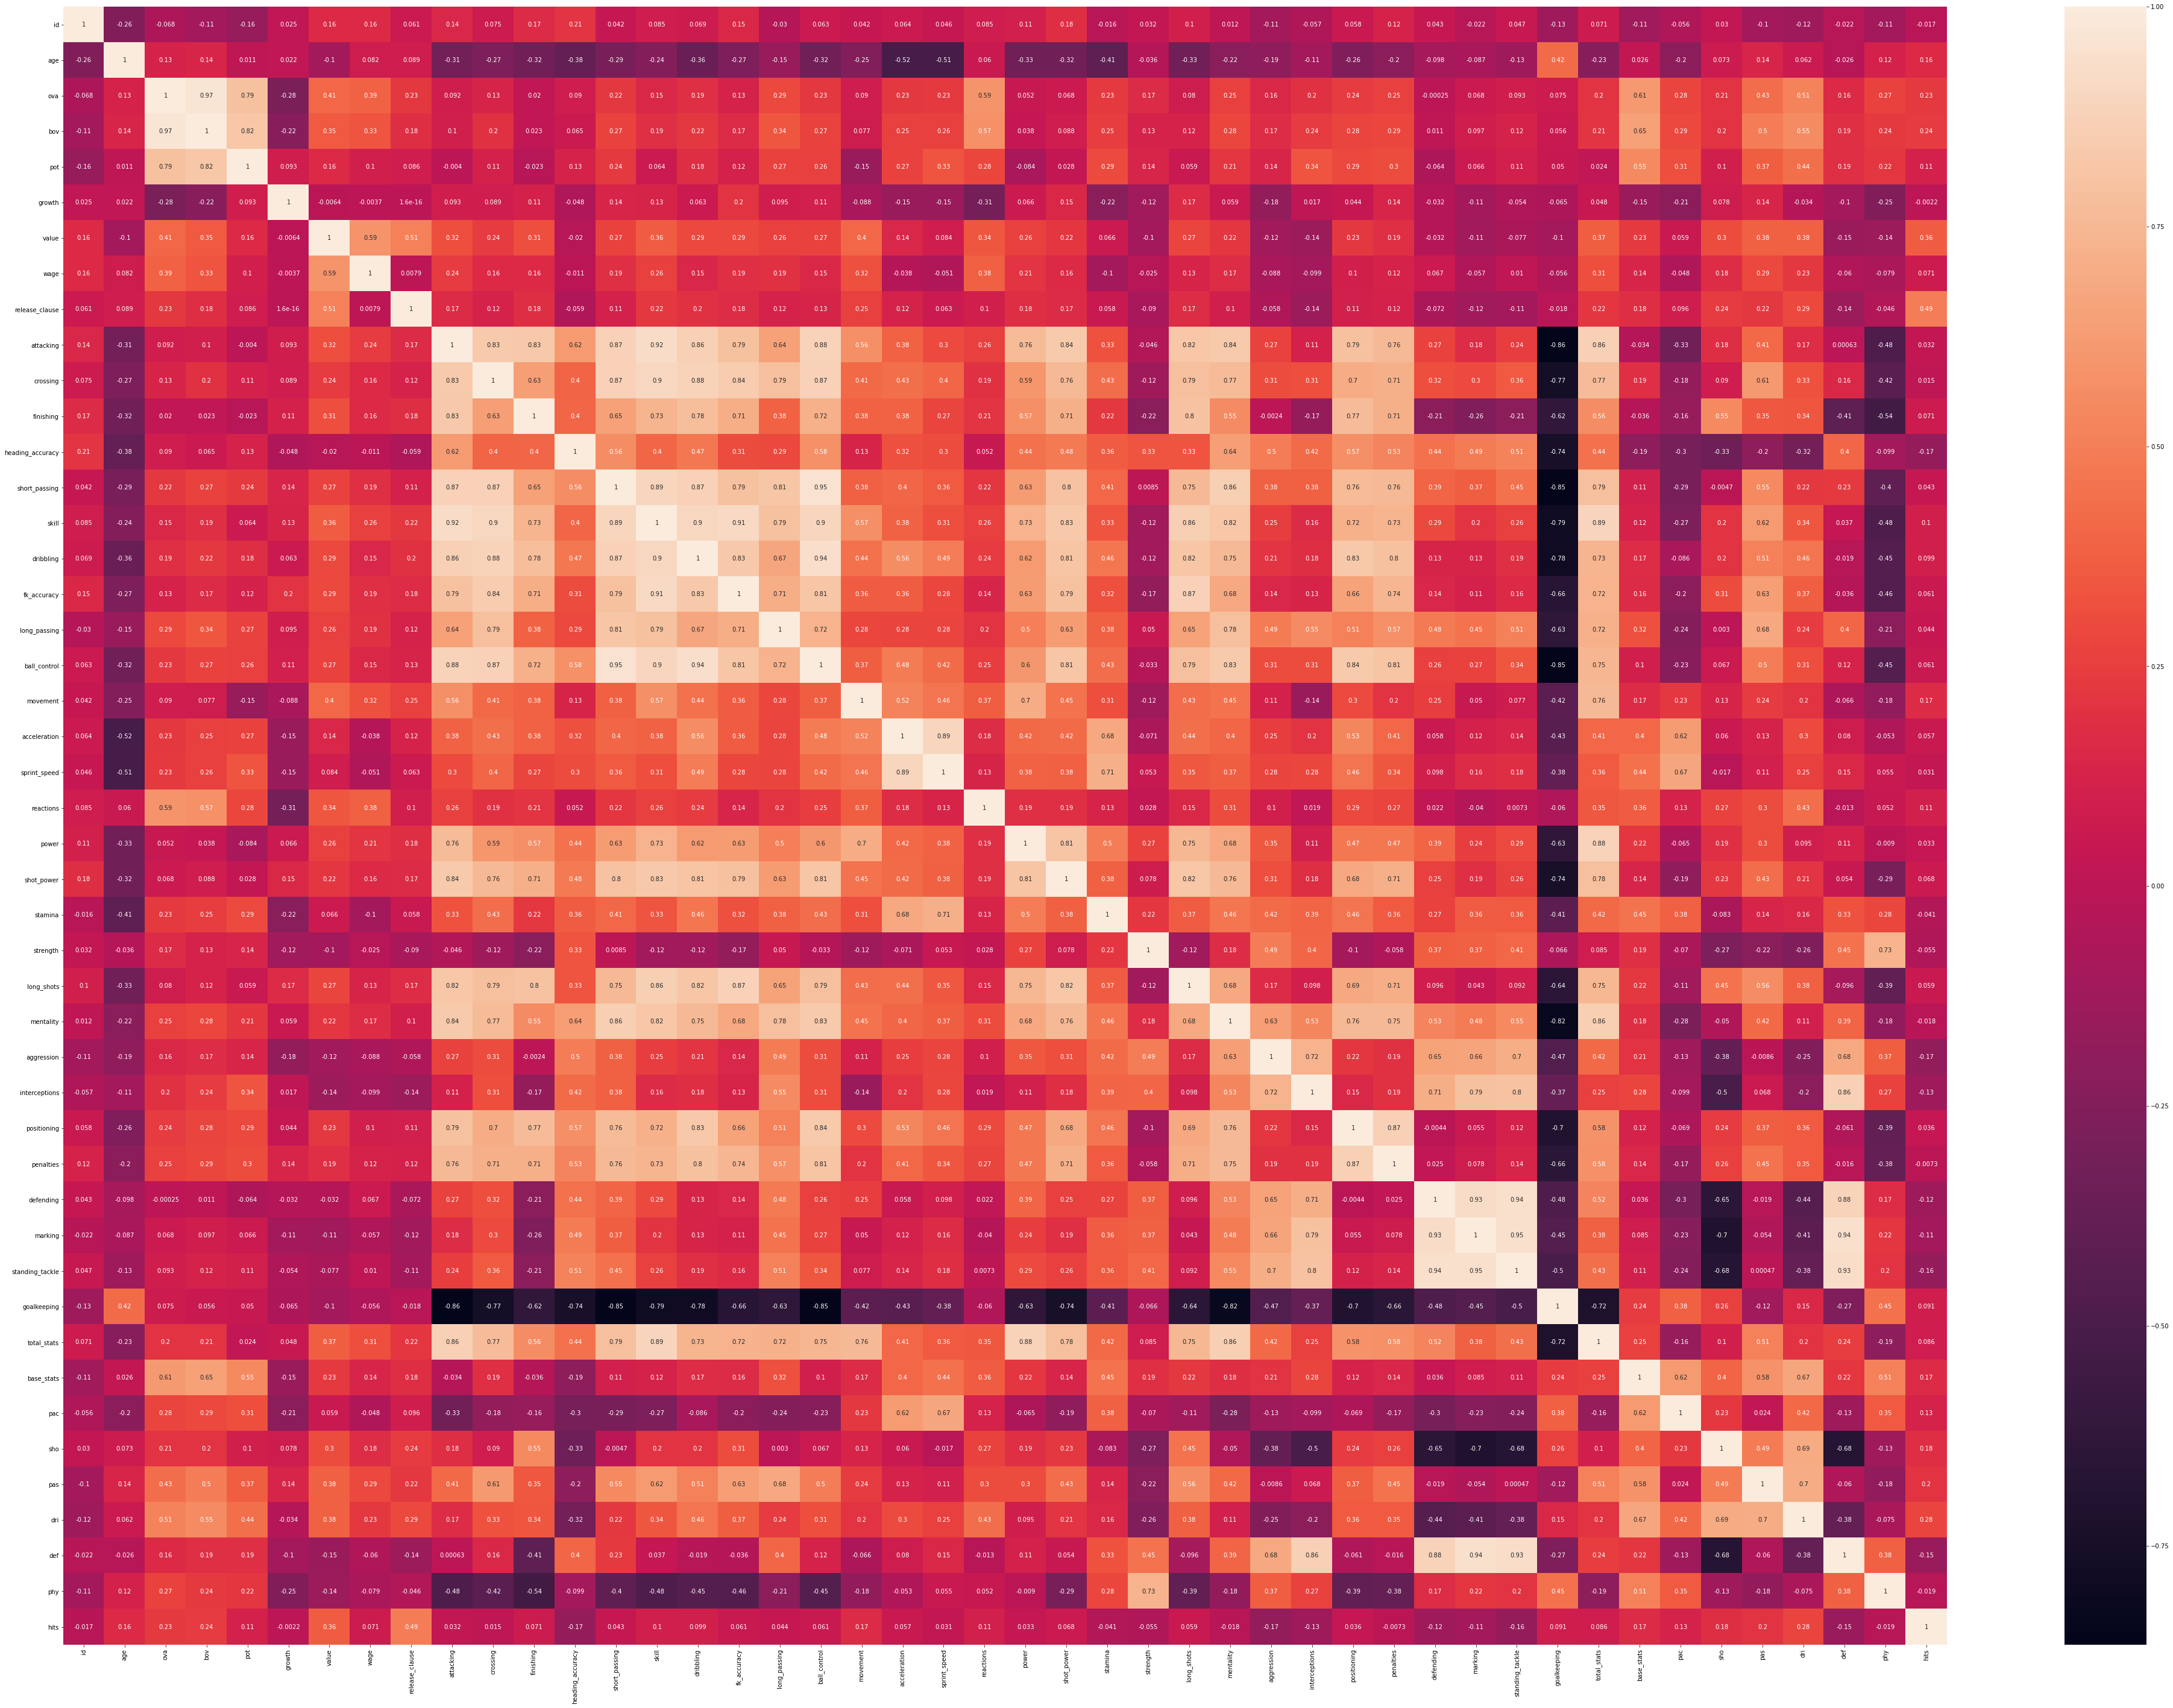

In [521]:
corr_matrix=data_model.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(70, 50))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

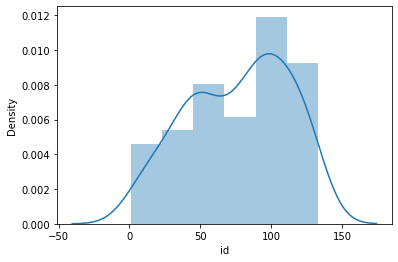

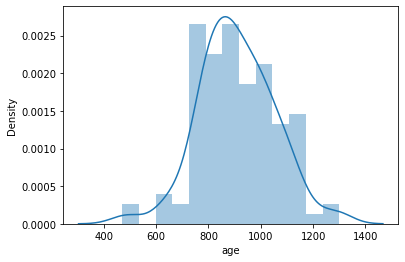

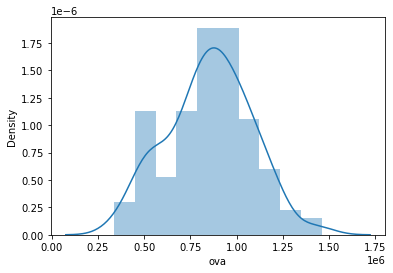

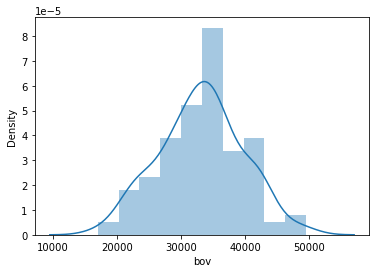

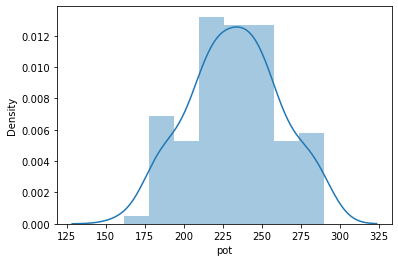

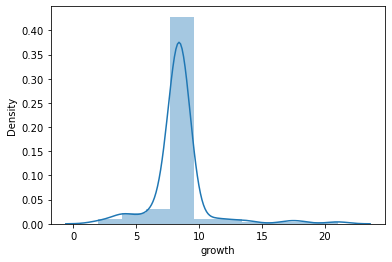

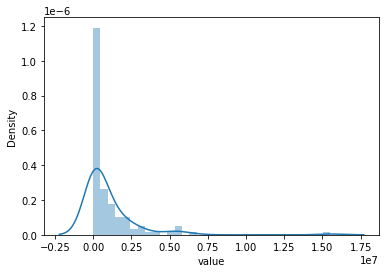

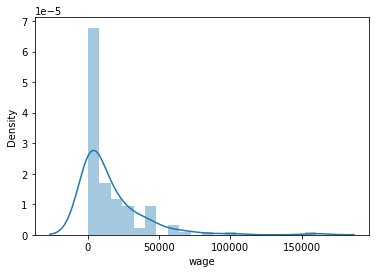

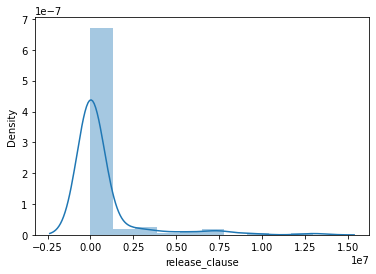

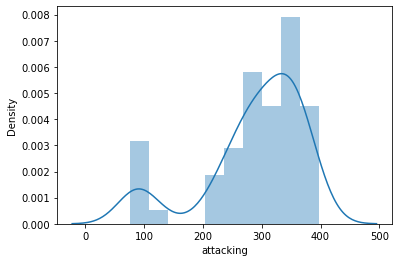

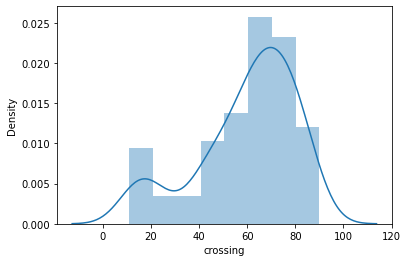

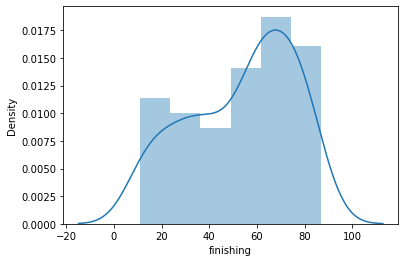

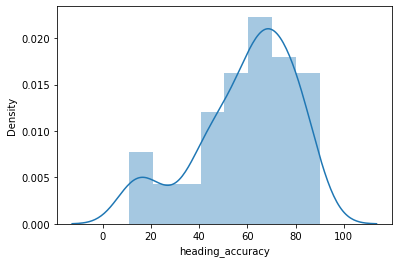

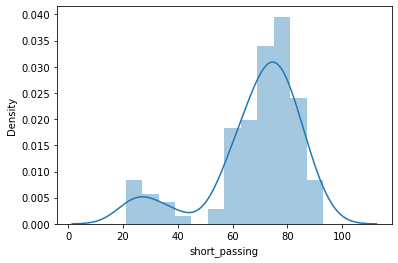

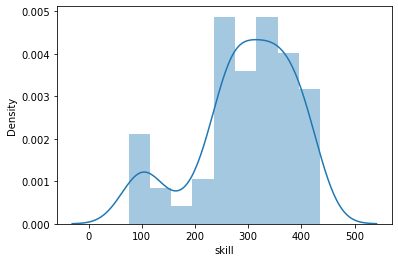

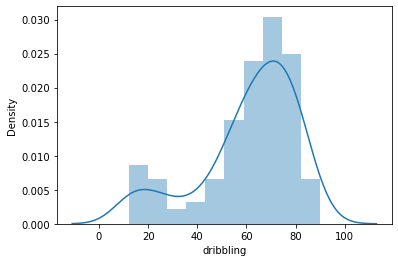

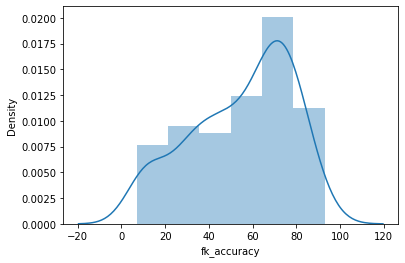

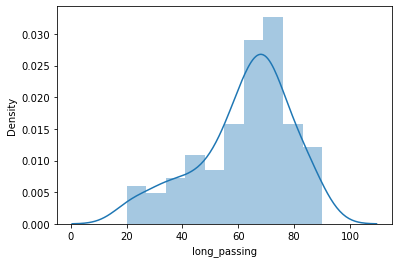

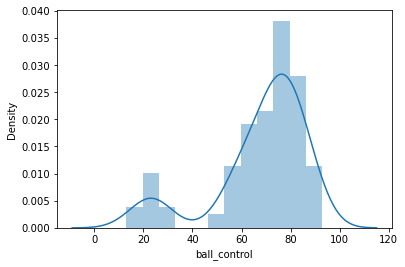

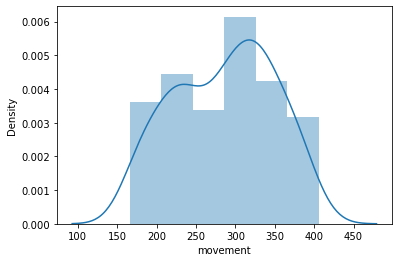

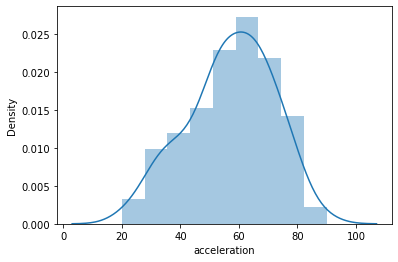

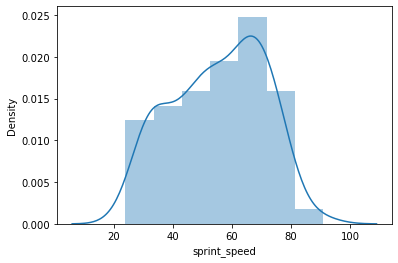

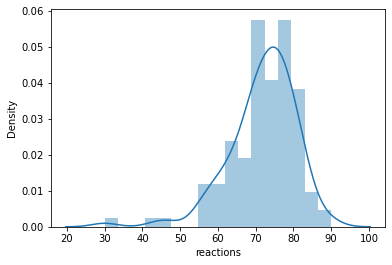

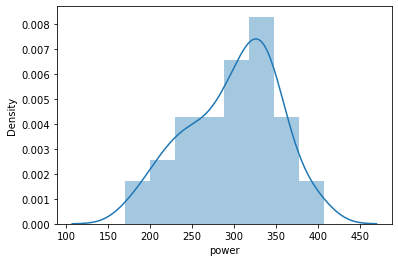

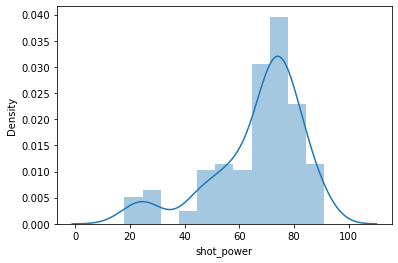

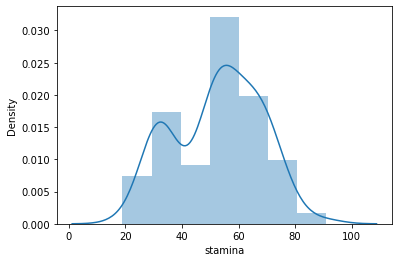

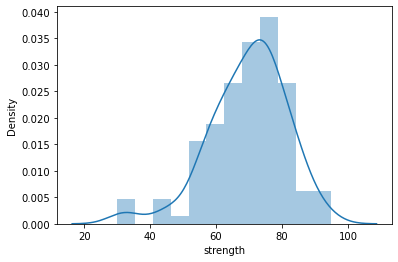

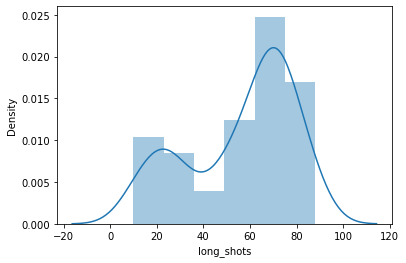

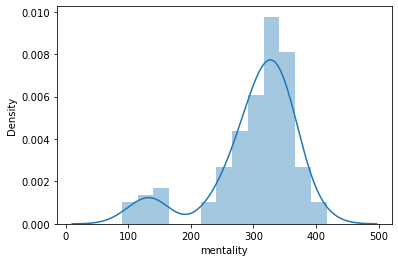

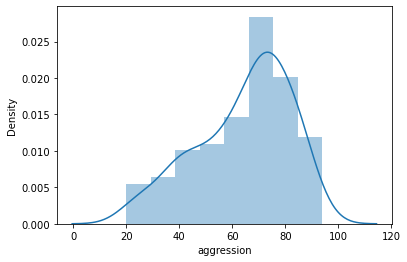

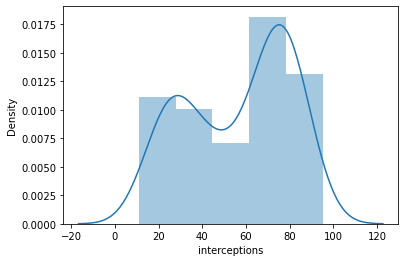

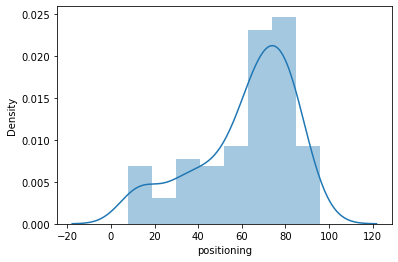

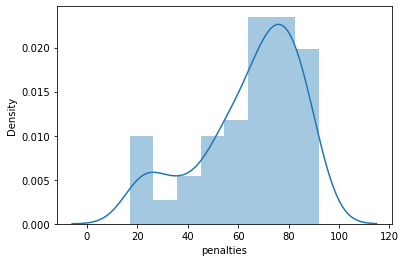

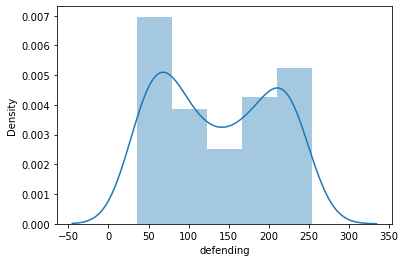

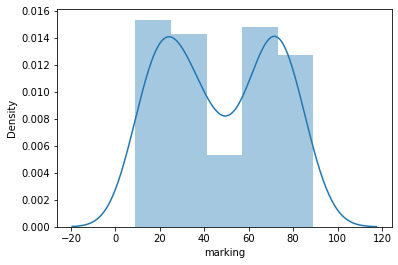

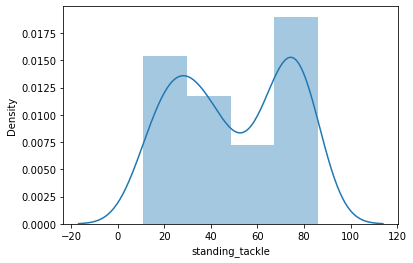

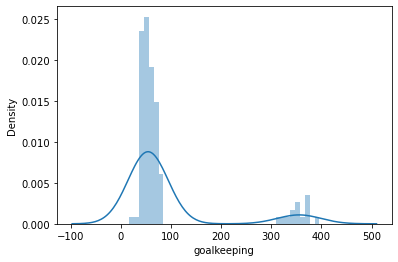

KeyError: 'gk_diving'

In [522]:
for col in data.select_dtypes(np.number):
    sns.distplot(data_model[col])
    plt.show()

In [502]:
def boxcox_transform(data_model):
    numeric_cols = data_model.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        
        data_model[column] = np.where(data[column]<=0, np.NAN, data_model[column]) 
        data_model[column] = data_model[column].fillna(data_model[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data_model[column] = transformed_data
        _ci[column] = [ci] 
    return data_model, _ci

In [523]:
data_model, _ci = boxcox_transform(data_model)
data_model

ValueError: Data must be positive.

In [524]:
def remove_outliers(data_model, threshold=1.5, in_columns=data_model.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data_model[column],75)
            lower = np.percentile(data_model[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data_model = data_model[(data_model[column]>lower_limit) & (data_model[column]<upper_limit)]
    return data_model

In [530]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

KeyError: 'value'

In [509]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(941755.3436353946, 1387024.1545403805)

In [533]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

KeyError: 'value'

# 9 - Questions

In [ ]:
# Rank players by market value.

In [127]:
query1 = '''
    select name, fifa21_male2.value , nationality, rank() over (order by fifa21_male2.value desc) as 'Rank'
    from fifa21_male2
    order by Value desc; 
    '''
data = pd.read_sql_query(query1, engine)
data.head()

,name,value,nationality,Rank
0,Tarantini,â‚¬975K,Portugal,1
1,R. Weidenfeller,â‚¬900K,Germany,2
2,S. Keita,â‚¬900K,Mali,2
3,C. Bellamy,â‚¬875K,Wales,4
4,Yuri,â‚¬850K,Brazil,5


In [ ]:
# 10 best value for italian or english players taking penalties 

In [311]:
query2 = '''
        select fifa21_male2.name, Nationality, Position, penalties, fifa21_male2.value , rank() over (order by penalties desc) as 'Rank'
        from fifa21_male2
        where Nationality = 'England' or Nationality = 'Italy'
        limit 10
        '''
data = pd.read_sql_query(query2, engine)
data.head()



,name,Nationality,Position,penalties,value,Rank
0,P. Maldini,Italy,CB,90,â‚¬0,1
1,M. Oddo B,Italy,,88,â‚¬130K,2
2,F. Totti,Italy,CF ST,86,â‚¬1.5M,3
3,F. Lampard,England,CM CDM CAM,84,â‚¬575K,4
4,A. Pirlo,Italy,CM CDM,84,â‚¬2.2M,4


In [ ]:
#Best value for goal keeper

In [313]:
query3 = '''
    select fifa21_male2.name, fifa21_male2.value, goalkeeping, position ,rank() over (order by fifa21_male2.value desc) as 'Rank'
    from fifa21_male2
    where Position = 'GK'
    order by goalkeeping desc
    '''
data = pd.read_sql_query(query3, engine)
data.head()

,name,value,goalkeeping,position,Rank
0,G. Buffon,â‚¬2.2M,396,GK,5
1,G. Coupet,â‚¬0,376,GK,8
2,Casillas,â‚¬1.3M,375,GK,6
3,Dida,â‚¬0,370,GK,8
4,C. Abbiati,â‚¬1.3M,369,GK,6
